## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

# The Datas

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
# data preparing
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:].reset_index(drop=True)
# IDV = 1
# df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
#                                (test_faulty.simulationRun==1)].iloc[:,3:]

In [5]:
df_train.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [6]:
df_test.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25025,3676.1,4518.7,9.3769,26.748,42.130,2704.3,75.375,120.42,0.33850,...,53.867,24.670,62.322,22.375,39.896,36.040,47.321,47.384,41.161,15.931
1,0.25331,3639.9,4487.0,9.3852,27.153,42.877,2704.6,74.702,120.37,0.33614,...,54.247,24.370,59.331,22.425,40.183,38.570,51.266,47.403,40.431,15.211
2,0.25096,3667.0,4481.4,9.3008,26.742,42.349,2706.5,76.107,120.41,0.33515,...,54.313,24.608,60.264,22.032,40.303,40.878,52.589,47.485,42.107,19.123
3,0.24879,3676.8,4536.7,9.3483,26.752,42.211,2706.3,75.858,120.38,0.33705,...,53.651,24.822,61.995,22.102,40.071,40.130,40.554,47.630,41.308,18.192
4,0.23790,3652.6,4492.4,9.2783,27.071,42.767,2704.7,74.040,120.41,0.32679,...,53.430,23.416,60.937,22.235,38.458,39.328,43.594,47.543,41.020,19.733


## Scaling Training Datas

In [7]:
def scl_pick(name, data):
    """
    the several option for name:
    -std
    -minmax
    -robust
    -norm
    -pwr
    """
    if name == 'std':
        std_scl = StandardScaler().fit(data)
        df_scl = std_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'minmax':
        MM_scl = MinMaxScaler().fit(data)
        df_scl = MM_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'robust':
        rb_scl = RobustScaler().fit(data)
        df_scl = rb_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'norm': ##### xxxxxx
        df_norm = Normalizer().fit(data)
        df_scl = df_norm.transform(data)
        df_scl = pd.DataFrame(df_scl)
    else:
        pt_scl = PowerTransformer().fit(data)
        df_scl = pt_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    return df_scl

### Important Parameters

In [8]:
nComponent = 30
nSamples = df_train.shape[0]
conf_T2 = 0.99

In [9]:
#-std-minmax-robust-norm-pwr
df_scl = scl_pick('robust', df_train) #robust

In [10]:
df_scl = round(df_scl, 4)

In [11]:
df_scl.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0161,0.3095,0.4387,-1.0147,-0.0644,0.2363,0.0504,-0.2091,0.5,0.0855,...,-0.3949,0.0221,0.7175,-0.0009,-0.0934,0.9596,0.3379,-0.3292,0.2105,0.1863
1,0.0357,-0.0594,0.9697,0.7171,-0.6334,0.8322,0.1289,-0.0122,0.5,-0.0650,...,-0.9805,0.0026,-1.1996,-0.0989,0.0572,0.0967,-0.8830,-0.3606,0.3495,-0.4568
2,0.0161,-0.0366,-0.5464,0.8615,-0.1118,-0.9007,0.2633,-0.3412,1.0,-0.1083,...,0.6930,0.0247,-0.0231,0.4485,0.0997,0.1966,0.0201,-0.3451,0.1293,1.2555
3,-0.0007,-0.0114,0.1135,1.1733,-0.5080,-0.9247,0.3754,0.3096,-0.5,-0.1159,...,-0.0364,0.0414,-0.8512,0.2580,0.1078,-0.0136,0.2730,-0.2734,0.7403,0.0026
4,1.2188,0.4359,-0.1770,-0.0695,-0.0644,1.0856,0.1401,0.5453,-0.5,-0.8159,...,-0.5475,1.1956,-0.3487,-0.3523,-0.5878,0.8754,0.3042,-0.3911,0.5531,0.1935


## Training Centraling kernel

In [12]:
# training proccess
A = df_scl
K = np.matmul(A, A.T)

C:\Users\m477a\AppData\Local\Temp/ipykernel_22448/605243457.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  K = np.matmul(A, A.T)


In [13]:
K = round(K, 4)

In [14]:
K = pd.DataFrame(K)
K.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,5.5913,-0.5181,-0.0321,-1.7792,3.2119,0.8766,-0.4944,0.4639,-0.8014,0.9281,...,0.4599,2.5594,-5.1953,2.0894,-2.1675,-5.6556,-1.6185,2.2867,-1.0814,-0.9864
1,-0.5181,8.4373,-1.0766,2.7443,1.0491,-0.8767,2.8401,2.2830,-2.2442,1.4829,...,0.8801,1.1952,-2.2143,0.1188,-0.1430,4.1460,2.9184,-3.2018,-4.9446,-0.3601
2,-0.0321,-1.0766,14.7987,9.2876,-0.5506,2.3805,1.0183,5.3368,-4.7893,2.2260,...,3.3381,3.8664,4.9688,-3.2767,2.9033,-1.3023,-0.6163,-1.8032,-1.2647,-2.2529
3,-1.7792,2.7443,9.2876,15.2941,-0.6093,0.4360,3.8382,3.8612,-3.8954,-1.1527,...,2.2427,2.5750,4.1539,0.7523,1.0522,3.6037,0.1213,-4.2110,-3.9486,0.7484
4,3.2119,1.0491,-0.5506,-0.6093,22.2775,19.1028,-1.1796,-3.3707,2.6894,1.6580,...,1.1942,3.1520,-4.8655,-0.4547,0.8588,-1.0321,-0.5124,3.5905,-2.1945,1.3274


In [15]:
s = (len(df_scl),len(df_scl))
unit = np.ones(s)/len(df_scl)

In [16]:
#######
unit = pd.DataFrame(unit)

In [17]:
unit.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [18]:
K_c = K-unit@K-K@unit+unit@K@unit

In [19]:
K_c = round(K_c, 4)

In [20]:
K_c.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,6.0777,-0.1422,0.4115,-1.3735,3.7195,1.4966,0.1468,1.0493,-0.0118,1.5179,...,0.4222,2.5319,-4.8053,2.2098,-1.9143,-5.5334,-1.7507,2.2354,-1.2340,-1.3610
1,-0.1422,8.7027,-0.7435,3.0396,1.4463,-0.3671,3.3708,2.7579,-1.5650,1.9623,...,0.7319,1.0572,-1.9348,0.1287,-0.0003,4.1578,2.6758,-3.3636,-5.2077,-0.8452
2,0.4115,-0.7435,15.1995,9.6506,-0.0857,2.9578,1.6167,5.8794,-4.0425,2.7730,...,3.2576,3.7961,5.3160,-3.1991,3.1137,-1.2229,-0.7912,-1.8973,-1.4601,-2.6703
3,-1.3735,3.0396,9.6506,15.6192,-0.1823,0.9754,4.3988,4.3660,-3.1864,-0.6435,...,2.1244,2.4669,4.4633,0.7921,1.2248,3.6453,-0.0915,-4.3429,-4.1818,0.2932
4,3.7195,1.4463,-0.0857,-0.1823,22.8064,19.7441,-0.5172,-2.7640,3.5003,2.2691,...,1.1778,3.1458,-4.4542,-0.3130,1.1333,-0.8886,-0.6233,3.5605,-2.3258,0.9741


In [21]:
# Compute Eigenvalues and Eigenvector
eigvls, eigvct = np.linalg.eig(K_c) # K_c

In [22]:
eigvls = eigvls.real

In [23]:
eigvct = eigvct.real

In [24]:
eigvct = pd.DataFrame(eigvct)

In [25]:
eigvct.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.009236,-0.021278,0.005735,0.011204,-0.023953,0.029021,0.046297,0.033948,0.005682,0.011180,...,-0.004083,0.002088,0.008445,-0.002345,-0.022687,-0.001617,0.014499,0.005549,-0.005895,-0.000162
1,0.011884,-0.005083,0.018300,0.017497,0.041126,0.007411,0.007932,-0.025720,-0.032851,-0.039360,...,-0.050372,0.059584,0.019549,-0.017527,0.018272,0.030785,-0.038309,-0.041388,0.002467,0.017669
2,0.011395,-0.006786,0.028961,0.010722,-0.052895,0.076471,-0.020368,-0.004152,-0.030626,-0.006206,...,0.007225,-0.127517,-0.016280,0.045200,-0.027218,0.003760,0.034619,-0.098265,0.079002,-0.000123
3,0.012333,-0.006654,0.013331,0.010824,-0.011701,0.021689,-0.019219,0.004695,-0.030004,-0.042697,...,0.008745,-0.009585,0.047978,0.002866,0.011574,-0.002350,0.038762,0.004171,-0.009867,0.083360
4,0.021066,-0.041475,0.023546,-0.018461,-0.003416,-0.007622,0.064725,0.044008,0.078418,0.026605,...,-0.060330,-0.062348,-0.060533,-0.017727,-0.014991,0.009408,-0.023725,0.040339,-0.038722,-0.057778


In [26]:
eigvls = pd.DataFrame(eigvls)

In [27]:
eigvls = round(eigvls, 4)

In [28]:
eigvls.head()

,0
0,1921.3774
1,1410.1365
2,944.6365
3,672.1728
4,600.9824


In [29]:
# score matrix
score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])

C:\Users\m477a\AppData\Local\Temp/ipykernel_22448/485419572.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])


In [30]:
score_train = round(score_train, 4)

In [31]:
score_train = pd.DataFrame(score_train)

In [32]:
score_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.7458,-30.0055,5.4171,7.5312,-14.3954,15.7779,24.0434,16.2982,2.5294,4.3637,...,-1.5907,-0.4157,-5.4953,-1.4942,9.1448,1.2217,-6.8822,-4.3992,0.6889,1.7966
1,22.8329,-7.1675,17.2871,11.7613,24.7162,4.0289,4.1191,-12.3480,-14.6240,-15.3624,...,10.0386,-13.6558,-18.6220,5.3272,7.4403,-8.5118,-2.5032,-3.0257,6.5024,-4.3455
2,21.8944,-9.5691,27.3574,7.2072,-31.7887,41.5753,-10.5776,-1.9936,-13.6333,-2.4222,...,-1.2301,-5.5057,11.8704,-4.5879,6.7174,9.5517,3.6126,9.0552,-0.8659,-7.1914
3,23.6968,-9.3829,12.5928,7.2753,-7.0319,11.7918,-9.9808,2.2540,-13.3564,-16.6648,...,13.8022,-10.8031,-0.6166,-0.9344,7.9909,-5.3804,10.2828,7.6218,2.0802,-15.2408
4,40.4765,-58.4853,22.2424,-12.4089,-2.0527,-4.1439,33.6134,21.1279,34.9080,10.3841,...,-3.6188,3.0055,-20.6460,-8.8553,14.7104,-1.0128,5.3660,6.4512,5.8764,4.6926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27.0726,42.8030,14.3472,-38.1975,27.5071,-38.2344,-27.2509,-15.5867,-16.9413,-32.3274,...,-3.7909,-16.9814,-6.1089,-15.2438,4.5453,-11.3974,2.4034,-3.7956,0.6598,0.8366
496,-7.1370,57.9582,-5.5602,60.6203,20.3735,9.7057,-8.4340,-13.7278,-2.3845,-8.3749,...,-8.1215,-0.6654,-9.9196,0.7744,-6.4997,-7.0170,-5.3486,8.0728,5.5051,2.7157
497,-30.9725,32.4778,-35.1369,61.8014,-9.7260,9.3474,14.3196,22.7212,24.6479,-3.3800,...,-22.8585,-3.1391,0.8206,-10.7785,-2.4633,2.1168,-3.8778,6.2852,-1.3274,10.7542
498,-2.7114,11.7059,-47.7749,-11.9804,-24.7132,-14.0636,-7.3654,-7.9999,24.0331,-11.1785,...,-15.5151,3.9924,7.1600,-4.4879,-5.8517,17.1668,-3.1917,6.0705,-7.0828,-14.5067


In [33]:
### T2 training Process
a = eigvls.iloc[:nComponent,:]
b = np.zeros((nComponent, nComponent), int)
np.fill_diagonal(b, a)

In [34]:
b.shape

(30, 30)

In [35]:
# b

In [36]:
invegvldiag = np.linalg.inv(b)

In [37]:
invegvldiag.shape

(30, 30)

In [38]:
# invegvldiag

In [39]:
T2_train = score_train@invegvldiag@score_train.T

In [40]:
T2_train = round(T2_train, 4)

In [41]:
T2_train.shape

(500, 500)

In [42]:
T2_train.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,5.6215,-0.1358,0.2967,-1.6340,3.8314,1.4188,0.3360,1.0265,-0.1748,1.3205,...,0.2918,2.4409,-4.3866,1.9797,-1.2659,-4.8973,-1.7909,2.1817,-0.5211,-0.7904
1,-0.1358,8.3294,-0.5362,3.0729,1.1910,-0.5511,2.9722,2.8504,-1.3782,1.9027,...,0.3685,0.9065,-1.8591,-0.1526,-0.1744,4.3626,2.7380,-3.5046,-5.4472,-1.0819
2,0.2967,-0.5362,14.2507,9.3734,0.3498,3.4656,1.4760,5.2431,-4.2729,2.3194,...,3.7859,4.4076,5.8761,-2.5385,3.4110,-0.8821,-0.3758,-1.4732,-0.9215,-1.6780
3,-1.6340,3.0729,9.3734,13.3947,-0.3649,1.0971,2.7150,3.2923,-4.5591,-1.4339,...,2.2146,2.0745,3.4769,0.5485,0.9067,3.8468,-0.4617,-5.0390,-3.5172,0.5722
4,3.8314,1.1910,0.3498,-0.3649,21.2046,19.0875,-0.1688,-1.4045,2.7573,1.8885,...,1.2727,2.9817,-5.2212,-0.7091,0.6875,-1.0816,-1.1507,3.1489,-2.5003,0.6222


In [43]:
# here the data is from training data 
# or with using same data
T2_tfinal = np.diag(T2_train)

In [44]:
# T2_tfinal

In [45]:
### T2 limit
# im using 16 component
# nComponent = 30
# nSamples = df_train.shape[0]
# conf_T2 = 0.99

In [46]:
from scipy.stats import f
F = f.ppf(conf_T2, nComponent, nSamples-nComponent)
T2_trlim = ((nComponent*(nSamples**2-1))/(nSamples*(nSamples-nComponent)))*F

In [47]:
T2_trlim
# conf_T2 = 0.95, T2_trlim = 47.3464294521146
# conf_T2 = 0.99, T2_trlim = 55.46204002064628

55.46204002064628

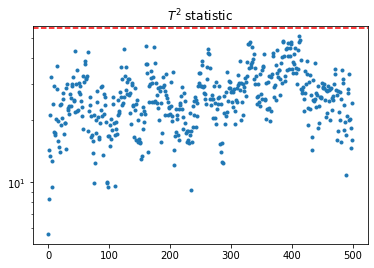

In [48]:
# plotting the result
plt.semilogy(T2_tfinal,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()
# in this scatter plot the data has been use is
# training data it self 

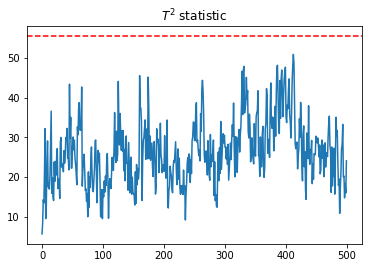

In [49]:
plt.plot(T2_tfinal)
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [50]:
print(f'T2: {(T2_tfinal>T2_trlim).sum()/T2_tfinal.shape[0]}')
# ofcourse 100% because we using train and test in the same dataset

T2: 0.0


## Scaling Testing Data

In [51]:
X_ts = scl_pick('robust', df_test) ##robust

In [52]:
X_ts = round(X_ts, 4)

In [53]:
X_ts

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.0035,0.2900,0.1990,0.2481,-0.5098,-0.7039,-0.18,0.5041,1.0,0.0688,...,-0.1912,0.0131,0.6219,0.2366,-0.0824,-0.4930,0.2882,-0.2027,0.0826,-1.1132
1,0.0710,-0.4876,-0.4046,0.3168,0.8713,1.7533,-0.15,-0.4091,-1.5,-0.0671,...,0.3923,-0.0602,-1.1702,0.3165,0.0543,0.1219,1.4972,-0.1974,-0.9478,-1.4795
2,0.0138,0.0945,-0.5112,-0.3813,-0.5303,0.0164,0.04,1.4973,0.5,-0.1240,...,0.4937,-0.0021,-0.6111,-0.3118,0.1115,0.6827,1.9027,-0.1746,1.4178,0.5108
3,-0.0391,0.3050,0.5416,0.0116,-0.4962,-0.4375,0.02,1.1594,-1.0,-0.0147,...,-0.5228,0.0502,0.4260,-0.1998,0.0010,0.5010,-1.7856,-0.1343,0.2900,0.0371
4,-0.3046,-0.2148,-0.3018,-0.5674,0.5916,1.3914,-0.14,-1.3073,0.5,-0.6052,...,-0.8622,-0.2934,-0.2079,0.0128,-0.7678,0.3061,-0.8540,-0.1585,-0.1164,0.8212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.1022,-0.6079,0.1475,0.2911,0.9906,-0.6480,-0.70,0.1024,-1.0,-0.2247,...,-0.6917,0.0839,0.9946,-0.3645,-0.1701,0.2733,0.0670,0.8173,-0.2378,0.0524
1996,1.3977,0.3845,0.8025,0.4946,-1.0827,-0.0033,-0.45,-0.2707,0.5,0.5925,...,0.2572,1.3698,-0.5045,-1.4836,0.4694,-0.7950,-0.5996,0.8090,0.7544,-1.2058
1997,1.3719,-0.0945,-0.1666,1.7022,0.7383,1.0658,-0.43,0.2693,0.0,0.4446,...,1.1923,1.3954,-1.1156,-1.5028,0.6191,0.7112,0.9379,0.8298,-0.8095,0.3160
1998,0.1098,0.5435,0.5702,0.9222,-0.1108,0.9276,-0.35,0.3901,2.0,0.0498,...,0.2541,0.1318,-0.2199,-0.7242,-0.0105,1.1902,-0.2594,0.9071,0.6175,-1.1473


In [54]:
df_scl

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0161,0.3095,0.4387,-1.0147,-0.0644,0.2363,0.0504,-0.2091,0.5,0.0855,...,-0.3949,0.0221,0.7175,-0.0009,-0.0934,0.9596,0.3379,-0.3292,0.2105,0.1863
1,0.0357,-0.0594,0.9697,0.7171,-0.6334,0.8322,0.1289,-0.0122,0.5,-0.0650,...,-0.9805,0.0026,-1.1996,-0.0989,0.0572,0.0967,-0.8830,-0.3606,0.3495,-0.4568
2,0.0161,-0.0366,-0.5464,0.8615,-0.1118,-0.9007,0.2633,-0.3412,1.0,-0.1083,...,0.6930,0.0247,-0.0231,0.4485,0.0997,0.1966,0.0201,-0.3451,0.1293,1.2555
3,-0.0007,-0.0114,0.1135,1.1733,-0.5080,-0.9247,0.3754,0.3096,-0.5,-0.1159,...,-0.0364,0.0414,-0.8512,0.2580,0.1078,-0.0136,0.2730,-0.2734,0.7403,0.0026
4,1.2188,0.4359,-0.1770,-0.0695,-0.0644,1.0856,0.1401,0.5453,-0.5,-0.8159,...,-0.5475,1.1956,-0.3487,-0.3523,-0.5878,0.8754,0.3042,-0.3911,0.5531,0.1935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.1040,-0.2489,-0.0346,1.1243,-1.0432,-0.0719,0.3754,-0.5539,0.0,-1.0067,...,0.2937,-0.2596,-1.0076,0.6352,-0.7078,-1.0629,-0.4292,0.5726,-0.0660,-0.8397
496,-0.4193,0.0316,0.4483,-0.0169,-0.1219,0.3459,0.0280,0.1645,0.0,1.3289,...,0.1091,-0.5111,-0.4368,0.1840,1.8084,-0.0262,-1.1999,0.6387,0.3220,-0.3331
497,-0.5264,-0.1352,-0.2540,-0.4285,0.0406,0.6952,-0.3978,-0.0955,-0.5,1.6367,...,0.8846,-0.4028,0.4596,-0.9219,1.4991,0.6604,0.0451,0.6474,0.2367,0.1186
498,-0.1973,-0.7391,0.2944,0.4062,0.1626,-0.0548,-0.2185,-0.1559,-1.5,0.2671,...,1.0035,-0.3382,1.0794,0.9681,-0.3291,-0.0548,0.2511,0.7281,-0.7540,0.5718


## Testing Process using Normal Dataset 

In [55]:
# linear kernel
# Kt = np.matmul(X_ts, df_train.T)
Kt = np.matmul(X_ts, df_scl.T)

C:\Users\m477a\AppData\Local\Temp/ipykernel_22448/1694315934.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Kt = np.matmul(X_ts, df_scl.T)


In [56]:
Kt.shape

(2000, 500)

In [57]:
# Kt

In [58]:
# centralize the kernel
st = (len(X_ts),len(df_train)) # 2000 or 960
unit_t = np.ones(st)/len(df_train)

In [59]:
#######
unit_t = pd.DataFrame(unit_t)

In [60]:
unit_t

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1996,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1997,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1998,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [61]:
Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit
# the result are NaN

In [62]:
Kt_c = round(Kt_c, 4)

In [63]:
Kt_c

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0188,1.0215,-1.4660,1.5186,-1.3545,-1.3153,2.2159,0.8179,-1.2094,1.0922,...,-3.3923,1.1752,0.8051,4.3029,-2.9390,2.0600,-1.1568,-1.1731,-2.5431,-1.4404
1,-0.7846,0.1073,-5.3418,0.7921,3.0303,0.1664,-0.2565,-1.8078,4.0919,-5.7388,...,-1.1305,-2.3121,-1.5139,8.7844,-1.8246,2.1515,-3.0177,1.0513,1.4741,8.9313
2,2.4853,-2.5587,6.3826,6.9272,2.3324,0.2460,0.4835,-1.8794,-5.1252,2.2843,...,0.9189,3.3676,0.9715,5.1658,0.4749,-3.0521,-4.1536,-0.4385,-3.2656,5.1107
3,0.1781,4.3833,2.5297,6.5030,-1.6825,-4.8087,5.0954,5.1175,0.6024,-4.8725,...,-3.2584,-6.2486,3.1835,-0.7552,-0.6708,1.6339,3.3172,-2.3688,-2.9202,-6.6667
4,2.2427,2.8768,-0.0979,-3.6247,6.1552,4.3584,-0.1796,4.5197,1.0541,0.5470,...,3.5367,1.3653,-3.3016,-5.1878,4.5571,1.4794,0.3545,0.0060,-1.4157,-2.0946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.0256,-3.2267,-0.2242,0.5043,-0.4823,-0.6418,-0.1367,-0.2541,0.8641,-5.3823,...,-0.2141,-1.6204,-3.5746,-4.8739,1.3321,-0.2140,-2.5051,-0.8088,4.6130,2.4314
1996,-4.0628,3.7545,-3.9482,0.8835,0.0119,-2.0839,-0.7814,-3.6789,-0.7329,2.8000,...,0.0765,3.2842,8.9108,8.8197,-0.6913,7.5614,4.0697,-0.6031,-2.2064,-2.0541
1997,-2.0520,-2.1996,-0.2109,-0.5470,6.1712,4.2556,-7.5386,-4.8411,2.7267,-1.1218,...,-1.7387,3.1020,10.6645,9.3399,-1.6697,-1.2467,-0.8042,6.1580,4.1240,11.3016
1998,0.5303,2.4416,0.3342,-1.5051,3.1487,0.9427,0.4626,2.2181,-13.7182,-3.6946,...,2.4626,11.0562,-8.0311,2.3554,-4.5367,-4.2883,5.9011,4.9918,-5.2968,-2.6332


In [64]:
score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])

C:\Users\m477a\AppData\Local\Temp/ipykernel_22448/2005656394.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])


In [65]:
score_test = round(score_test, 4)

In [66]:
score_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,6.2522,-16.5604,6.9500,12.1403,24.1203,-24.2168,-0.7119,14.2208,-10.7054,-1.2672,...,-0.0266,-1.8248,-2.1109,-5.2978,8.1373,-2.8136,-1.5360,-2.5067,-1.9525,1.2615
1,-3.1338,-25.9309,-34.1928,-1.3121,-3.1725,-60.7121,28.0195,25.1383,8.9503,-14.6828,...,-0.1672,-11.2750,1.3392,-1.4573,-9.9254,-0.6956,6.6704,2.4412,-0.9473,-3.3949
2,-12.1051,-18.0488,28.9146,-0.1250,-49.1862,5.2862,8.3648,41.6174,-22.6251,7.4831,...,-1.7763,-12.1778,-1.0279,-1.4643,-4.8413,-9.6694,15.0042,-7.7464,-12.2579,-13.6094
3,-8.1831,-8.8509,-14.5989,9.5084,32.8458,46.9232,-8.9680,-29.2560,-0.6895,0.3762,...,4.1892,-11.6515,-5.7436,2.6249,17.4862,-12.8371,3.3065,-13.1430,-6.4301,-15.7539
4,19.6697,-2.9693,23.5209,-19.7780,-1.5467,31.9657,5.6242,-5.8701,15.3834,-7.4251,...,-19.2280,-6.6392,-13.1211,0.6643,15.9505,3.0048,-1.7123,4.5291,2.9316,9.0924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-70.3000,-10.1117,-26.3532,-23.5399,2.7131,10.5514,2.9892,2.3767,-2.3587,1.9600,...,0.6129,14.5502,-2.1388,-5.5382,0.5804,23.5635,8.5027,-10.5010,21.8863,-6.3508
1996,-80.4047,15.5018,51.6190,18.6623,45.8489,-29.3822,-0.5561,-20.0772,-3.3920,-9.8103,...,-2.3183,-15.6505,-3.7298,-0.4109,9.2879,8.5998,4.6877,-11.2148,15.4550,-6.8248
1997,-73.7599,0.3587,23.5028,5.7171,-23.8187,-13.7779,33.3891,9.6680,28.4560,-7.5115,...,-8.3134,-18.2702,2.4819,-3.3934,-4.9926,22.4112,12.7142,-7.5693,7.2985,-3.4525
1998,-50.3724,7.7406,38.3425,23.0753,43.0044,14.3275,33.2000,38.9186,-27.6553,2.3268,...,12.8052,8.6977,5.3972,12.7110,-4.4248,3.9366,-8.8082,8.2996,-3.4439,1.2343


In [67]:
T2_test = score_test@invegvldiag@score_test.T
T2_test_final = np.diag(T2_test)

In [68]:
T2_test = round(T2_test, 4)

In [69]:
T2_test

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,6.3780,0.6880,0.1578,-0.2273,-2.5936,1.8312,3.2244,3.1650,0.3623,-1.0284,...,2.1278,1.1235,1.1816,-2.4504,2.5620,-1.7547,3.3849,-3.6565,0.0311,-3.4829
1,0.6880,18.3059,1.9875,-6.3078,-1.1269,0.2721,3.2803,9.1337,-0.2132,-0.7841,...,3.8107,-0.0785,5.1059,-1.4989,4.9471,0.2417,-0.8612,7.7133,-0.6726,2.9671
2,0.1578,1.9875,18.5998,-0.6262,-3.5579,-0.8053,1.8637,1.0370,1.8990,2.0365,...,3.9093,4.6479,0.8723,-1.6522,0.0938,-1.5430,-0.7306,6.3608,1.8135,1.2642
3,-0.2273,-6.3078,-0.6262,16.1562,2.0521,0.6347,0.6708,1.1892,4.7466,4.2468,...,3.8137,-1.7973,-2.9693,5.7548,-3.9527,0.8693,3.0835,-4.1575,-2.3772,-4.1168
4,-2.5936,-1.1269,-3.5579,2.0521,14.5520,6.3029,-0.2222,-0.3224,-2.6195,0.1934,...,-2.5129,-1.3693,-0.2569,5.7449,-5.1481,-0.8773,-2.4159,0.1442,-3.3054,-1.4296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.7547,0.2417,-1.5430,0.8693,-0.8773,-1.0918,-1.1636,1.6964,4.5328,3.9936,...,2.9319,3.2765,1.4918,3.3734,12.6722,14.7518,4.7755,6.6148,0.2220,4.0947
1996,3.3849,-0.8612,-0.7306,3.0835,-2.4159,1.3395,6.0768,3.0426,-0.5697,-1.8718,...,5.9243,2.8919,3.4920,1.6906,9.2680,4.7755,22.9637,11.8630,4.6943,-0.4756
1997,-3.6565,7.7133,6.3608,-4.1575,0.1442,2.0325,1.1915,3.5711,-2.1864,-2.5468,...,-1.9656,2.4971,2.5665,3.7581,9.2089,6.6148,11.8630,26.4048,3.4100,6.0895
1998,0.0311,-0.6726,1.8135,-2.3772,-3.3054,-0.1337,5.8349,0.3028,-0.2407,-1.4305,...,2.9707,1.0674,4.9789,5.6069,0.6794,0.2220,4.6943,3.4100,22.2915,5.5033


In [70]:
T2_test_final = np.diag(T2_test)

In [71]:
T2_test_final.shape

(2000,)

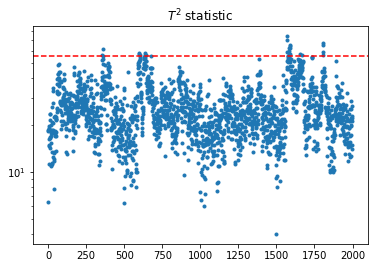

In [72]:
plt.figure(figsize=(6,4))
plt.semilogy(T2_test_final,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

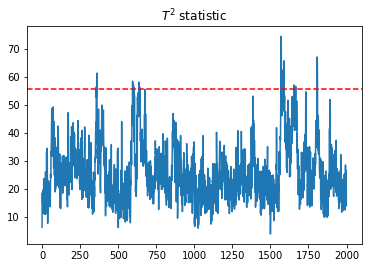

In [73]:
plt.figure(figsize=(6,4))
plt.plot(T2_test_final)
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [74]:
print(f'T2: {(T2_test_final>T2_trlim).sum()/T2_test_final.shape[0]}')

T2: 0.0145


## Testing Process using Faulty Dataset 

In [75]:
## STEPs
# 1-standardize the data
# 2-linear kernel
# 3-Centralize the kernel
# 4-Score faulty
# 5-T2 faulty

### The Data

In [76]:
IDV = 1
df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
                               (test_faulty.simulationRun==1)].iloc[:,3:]

In [77]:
# Scaling the data
X_ts = scl_pick('std', df_test)

In [78]:
Kt = np.matmul(X_ts, df_scl.T)

C:\Users\m477a\AppData\Local\Temp/ipykernel_22448/512610052.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Kt = np.matmul(X_ts, df_scl.T)


In [79]:
# centralize the kernel
st = (len(X_ts),len(df_train)) # 2000 or 960
unit_t = np.ones(st)/len(df_train)

In [80]:
#######
unit_t = pd.DataFrame(unit_t)

In [81]:
Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit
# the result are NaN

In [82]:
Kt_c = round(Kt_c, 4)
# Kt_c

In [83]:
score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])
score_test = round(score_test, 4)

C:\Users\m477a\AppData\Local\Temp/ipykernel_22448/3252352834.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])


In [84]:
# score_test

In [85]:
T2_test = score_test@invegvldiag@score_test.T

In [86]:
T2_test = round(T2_test, 4)

In [87]:
T2_test_final = np.diag(T2_test)

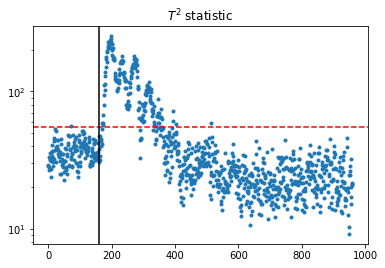

In [88]:
plt.figure(figsize=(6,4))
plt.semilogy(T2_test_final,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()

In [89]:
print(f'T2: {(T2_test_final[160:]>T2_trlim).sum()/T2_test_final[160:].shape[0]}')

T2: 0.2225
